In [1]:
# Assignment 1
# Perform the actions accordingly in the areas marked as [CODE HERE]

In [1]:
import numpy as np
import gymnasium
from moviepy.editor import VideoClip, vfx
import session_info

In [2]:
#Functions to create the movie (not relevant for RL)

def create_and_show_movie(env, file_name, speed=5):
    def make_frame(frame):
        return env.myimages[int(frame)]

    # creating animation
    animation = VideoClip(make_frame, duration = len(env.myimages))
    animation.write_videofile(file_name,fps=speed)
    return animation.fx(vfx.speedx, speed)

Now, you need to upload the 'Russell_Grid.py' file to the working directory (or alternatively copy all source code of Russell_Grid.py in a cell). If you upload the file, then you should import the class for the environment.


In [3]:
from Russell_Grid import RussellGrid

Now create the environment setting the mode of visualization to movie

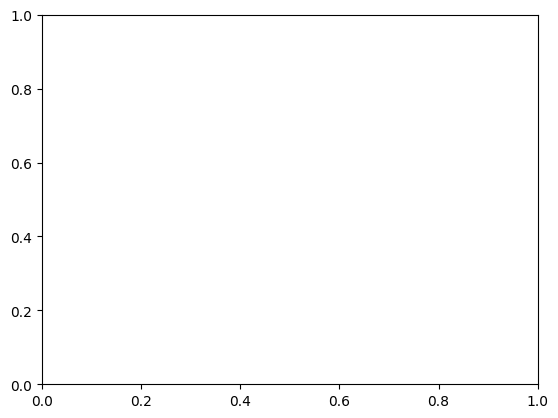

In [4]:
env = RussellGrid(mode='movie') # We are in jupyter, so we cannot see interactive . Instead, we will create a movie

###Task 1

 Create the function 'one_random_episode' that runs one episode in the Grid world choosing random actions and returns the list of rewards collected for each step in the episode. The function should have a boolean parameter "render" that renders the position of the agent on the grid when True.

In [6]:
state = env.reset()
state

6

In [7]:

def one_random_episode(render = False):
  """
    The function "one_random_episode" runs a random episode in an environment and returns a list of
    rewards obtained during the episode.

    :param render: The "render" parameter is a boolean flag that determines whether or not to render the
    environment during the episode. If set to True, the environment will be visually displayed as the
    episode progresses. If set to False, the environment will not be rendered, defaults to False
    (optional)
    :return: a list of rewards obtained during a random episode in the environment.
  """
  env.reset()
  lr = []
#[CODE HERE] Activity 2.1 One Random Episode

  done = False
  while not done:
    if render:
       env.render()
    action = env.action_space.sample()
    state, reward, done, _, info = env.step(action)
    lr.append(reward)
    if done:
       if render:
          env.render()
       env.reset()

  return lr


In [8]:
lr = one_random_episode(render = True)

Let's use your function with render set to True and see the movie created with th random behavior of the agent.




In [9]:
# Now we execute the function you have defined
env.removeframes() # Let's remove frames from previous episodes for the movie
lr=one_random_episode(render = True) # Run one episode (with render True) an store list of rewards
print('Rewards:',lr) # Print rewards

# Visualization of the video (it will be also stored on file 'trajectories.mp4')
speed = 5
create_and_show_movie(env,'trajectories.mp4',speed=speed).ipython_display(autoplay=1, loop=0,fps=speed)


Rewards: [np.float64(-0.04), np.float64(-0.04), np.float64(-0.04), np.float64(-0.04), np.float64(-0.04), np.float64(-0.04), np.float64(-0.04), np.float64(-0.04), np.float64(-0.04), np.float64(-0.04), np.float64(-0.04), np.float64(-0.04), np.float64(-0.04), np.float64(-0.04), np.float64(-0.04), np.float64(-0.04), np.float64(-0.04), np.float64(-0.04), np.float64(-0.04), np.float64(-0.04), np.float64(-0.04), np.float64(-0.04), np.float64(-0.04), np.float64(-0.04), np.float64(-0.04), np.float64(-0.04), np.float64(-0.04), np.float64(-0.04), np.float64(-0.04), np.float64(-0.04), np.float64(-0.04), np.float64(-0.04), np.float64(-0.04), np.float64(-0.04), np.float64(-0.04), np.float64(-0.04), np.float64(-0.04), np.float64(-0.04), np.float64(-0.04), np.float64(-0.04), np.float64(-0.04), np.float64(-0.04), np.float64(-0.04), np.float64(-0.04), np.float64(-0.04), np.float64(-0.04), np.float64(-0.04), np.float64(-0.04), np.float64(-0.04), np.float64(-0.04), np.float64(-0.04), np.float64(-0.04), np

Moviepy - Done !
Moviepy - video ready trajectories.mp4
Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


### Task 2
 Define a function 'long_term_reward' that, given a list of rewards in one episode, return the long-term reward for the whole episode. Test it and return the long_term reward of that episode. Run the cell several times to see that at each execution you get different results.

 When executing one_random_episode to collect statistics (like now), render should be set to False because it consumes a lot of resources.


In [10]:
#[CODE HERE] Activity 2.2 Long Term Reward - no decay
def long_term_reward(ep):
    total = 0
    for i in range(0, len(ep)):
       total = total + ep[i] 
    return total

# Test it
long_term_reward(one_random_episode())
print(long_term_reward(one_random_episode()))

-2.4400000000000004


In [11]:
# Execute 1000 episodes and show mean and std of the long-term-return collected in those episodes.
collected=[]

#[CODE HERE] Activity 2.2 Long Term Reward - no decay
for i in range (0,1000):
   collected.append(long_term_reward(one_random_episode()))


print('Mean', np.mean(collected), 'Std', np.std(collected))

Mean -1.1717200000000003 Std 1.3111272408122718


In [12]:
#[CODE HERE] Activity 2.2 Long Term Reward - decay
# we use a decay of 0.99 (balancing long and short term rewards)
def long_term_reward(ep):
    total = 0
    for i in range(0, len(ep)):
       total = total + ep[i] * (0.99)**i
    return total

# Test it
long_term_reward(one_random_episode())
print(long_term_reward(one_random_episode()))

-1.5462791872083073


In [13]:
# Execute 1000 episodes and show mean and std of the long-term-return collected in those episodes.
collected=[]

#[CODE HERE] Activity 2.2 Long Term Reward - no decay
for i in range (0,1000):
   collected.append(long_term_reward(one_random_episode()))


print('Mean', np.mean(collected), 'Std', np.std(collected))

Mean -0.9239314596713574 Std 0.9755751119235745


You should obtain something close to:

Mean -0.8878, Std 0.9891

In [14]:
# Defining an optimal Policy

In [15]:
#Visualizing the action space
env.action_space
# The action space is 0-UP, 1-RIGHT, 2-DOWN, 3-LEFT

Discrete(4)

In [16]:
# Defining an Optimal policy

# Define your policy here for all possible states
#
# Remember actions = 0, 1, 2, 3 which are UP, RIGHT, DOWN, LEFT
#  0  1  2  3            [0,0] [0,1] [0,2] [0,3]
#  4  5  6  7            [1,0] [1,1] [1,2] [1,3]
#  8  9  10 11           [2,0] [2,1] [2,2] [2,3]
#
#[CODE HERE] Activity 2.3 Long Term Reward - decay

policy=np.zeros((env.world_row,env.world_col))

policy[0,0]=1

policy[0,1]=1
policy[0,2]=1

policy[1,0]=0
policy[1,2]=0

policy[2,0]=0
policy[2,1]=3
policy[2,2]=3
policy[2,3]=3

In [17]:
def one_episode_my_policy(render = False):
  """
    The function "one_random_episode" runs an episode according to the policy defined in table 'policy'
    and returns a list of rewards obtained during the episode.

    :param render: The "render" parameter is a boolean flag that determines whether or not to render the
    environment during the episode. If set to True, the environment will be visually displayed as the
    episode progresses. If set to False, the environment will not be rendered, defaults to False
    (optional)
    :return: a list of rewards obtained during a random episode in the environment.
  """
  lr = []

  #[CODE HERE] Activity 2.3 Optimal Policy
  env.reset()
  done = False
  state = 9
  while not done:
    if render:
       env.render()
    action = int(policy[(state // 4), (state % 4)])
    state, reward, done, _, info = env.step(action)
    lr.append(reward)
    if done:
       if render:
          env.render()
       env.reset()

  return lr
lr = one_episode_my_policy()
print(lr)

[np.float64(-0.04), np.float64(-0.04), np.float64(-0.04), np.float64(-0.04), np.float64(-0.04), np.float64(-0.04), np.float64(-0.04), np.float64(-0.04), np.float64(-0.04), np.float64(1.0)]


Let's use your function with render set to True and see the movie created with th random behavior of the agent.

In [18]:
# Now we execute the function you have defined
env.removeframes() # Let's remove frames from previous episodes for the movie
lr = one_episode_my_policy(render = True) # Run one episode (with render True) an store list of rewards
print('Rewards:',lr) # Print rewards

# Visualization of the video (it will be also stored on file 'trajectories.mp4')
speed = 5
create_and_show_movie(env,'trajectories.mp4',speed=speed).ipython_display(autoplay=1, loop=0,fps=speed)


Rewards: [np.float64(-0.04), np.float64(-0.04), np.float64(-0.04), np.float64(-0.04), np.float64(-0.04), np.float64(-0.04), np.float64(-0.04), np.float64(1.0)]
Moviepy - Building video trajectories.mp4.
Moviepy - Writing video trajectories.mp4



Moviepy - Done !
Moviepy - video ready trajectories.mp4
Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4



Execute 1000 episodes and show mean and std of the long-term-return collected in those episodes.


In [19]:
import numpy as np
collected=[]
#[CODE HERE] Activity 2.3 Optimal Policy Calculate long term reward for optimal policy
for i in range (0,100000):
   collected.append(long_term_reward(one_episode_my_policy()))

print('Mean', np.mean(collected), 'Std', np.std(collected))

Mean 0.6682090835772109 Std 0.37755660671072155


In [20]:
session_info.show(html=False)

-----
Russell_Grid        NA
gymnasium           0.29.1
moviepy             1.0.3
numpy               2.0.0
session_info        1.0.0
-----
IPython             8.26.0
jupyter_client      8.6.2
jupyter_core        5.7.2
-----
Python 3.12.3 (main, Jul 31 2024, 17:43:48) [GCC 13.2.0]
Linux-5.15.153.1-microsoft-standard-WSL2-x86_64-with-glibc2.39
-----
Session information updated at 2024-08-03 12:18
